# Final Part II - Disney Movie Data Set
Notebook by Sonam Okuda and Jade Lombardo

<b>Problem Statement:</b> We want to identify trends and predict the profit of a movie based on its budget and IMDB rating.

In [29]:
# Importing all necessary dependencies and packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

<h1> Importing and Selecting Data </h1>

We decided to do our final project on the movies released by Disney. To begin, we found a CSV file on GitHub that had a decent catalogue of movies, with release dates up to 2020. Although the dataset included movies dating back to when Snow White came out, we decided to only look at movies released after 2000.

On top of the existing columns, we appended a *profit* column, which was calculated as *box_office* - *budget*.


In [30]:
from google.colab import drive

drive.mount('/content/drive')
address = '/content/drive/MyDrive/me371/DisneyMoviesDataset.xlsx'

df = pd.read_excel(address)
# Sorts the df into movies released in chronological order

year =df.loc[df['Release date (datetime)']>'2000-01-01']

new_df = year.loc[:,["title", "Running time (int)", "Budget (float)", "Box office (float)", "Release date (datetime)",'imdb']]

new = new_df.dropna()

new.reset_index(drop=True, inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1> Exploring Data </h1>

The target variable that we want our models to predict for will be related to *box_office* or the revenue of the film. So, we plotted a lot of the factors described in the dataset against total revenue (described by the *profit* column). We also analyzed the correlation coefficients between variables to better inform what factors we will select for our regression models.

Variables that seem to have correlation:
<ul>
<li> release date and box office
<li> runtime and budget
<li> runtime and box office
<li> box office and critic score (obviously)
<li> box office and profit (obviously)
</ul>

The correlated factors listed as obvious relationships are because they are intrinsically/implicitly linked, and will be disregarded when developing the models for this project. Currently, the strongest correlation is between critic score and box office.

<ipython-input-31-0c5064186f8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Box office (float)']=new['Box office (float)'].astype('int64')
<ipython-input-31-0c5064186f8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Budget (float)']=new['Budget (float)'].astype('int64')
<ipython-input-31-0c5064186f8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Text(0.5, 1.0, 'Run time vs Box Office')

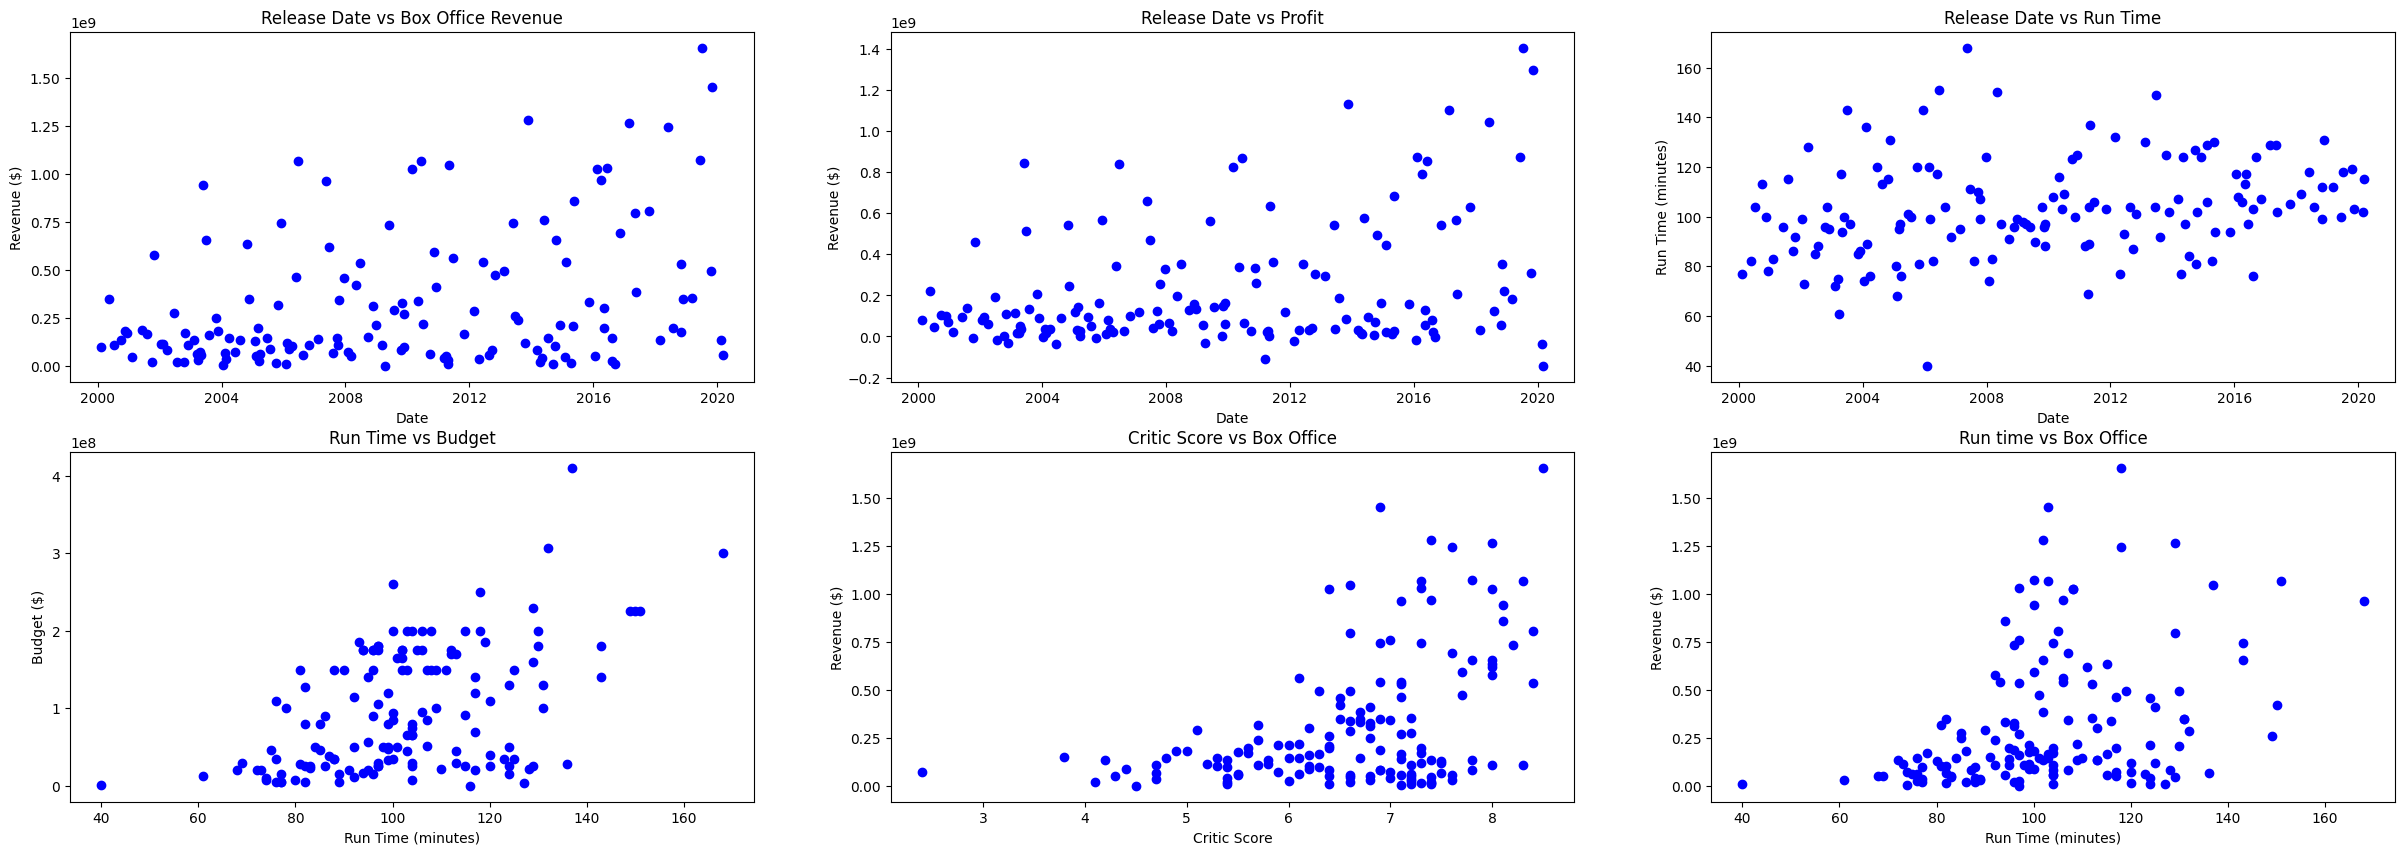

In [31]:
date = new['Release date (datetime)']

new['Box office (float)']=new['Box office (float)'].astype('int64')
new['Budget (float)']=new['Budget (float)'].astype('int64')

rev = new['Box office (float)']
run = new['Running time (int)']
crit = new['imdb']
bud= new['Budget (float)']

new['profit'] = new['Box office (float)']-new['Budget (float)']
profit = new['profit']

expl_fig = plt.figure(figsize = (30,10))

expl_fig.add_subplot(2, 3, 1)
plt.scatter(date, rev, color='b')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.title("Release Date vs Box Office Revenue")

expl_fig.add_subplot(2, 3, 2)
plt.scatter(date, profit, color='b')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.title("Release Date vs Profit")

expl_fig.add_subplot(2, 3, 3)
plt.scatter(date, run, color='b')
plt.xlabel('Date')
plt.ylabel('Run Time (minutes)')
plt.title("Release Date vs Run Time")

expl_fig.add_subplot(2, 3, 4)
plt.scatter(run, bud, color='b')
plt.xlabel('Run Time (minutes)')
plt.ylabel('Budget ($)')
plt.title("Run Time vs Budget")

expl_fig.add_subplot(2, 3, 5)
plt.scatter(crit, rev, color='b')
plt.xlabel('Critic Score')
plt.ylabel('Revenue ($)')
plt.title("Critic Score vs Box Office")

expl_fig.add_subplot(2, 3, 6)
plt.scatter(run, rev, color='b')
plt.xlabel('Run Time (minutes)')
plt.ylabel('Revenue ($)')
plt.title("Run time vs Box Office")

In [32]:
new.corr() #as seen, the strongest correlation is between box office, imdb, and budget

<ipython-input-32-e972c9ae652d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new.corr() #as seen, the strongest correlation is between box office, imdb, and budget


,Running time (int),Budget (float),Box office (float),imdb,profit
Running time (int),1.000000,0.475206,0.349789,0.255169,0.285045
Budget (float),0.475206,1.000000,0.720923,0.316071,0.582050
Box office (float),0.349789,0.720923,1.000000,0.447549,0.983141
imdb,0.255169,0.316071,0.447549,1.000000,0.441739
profit,0.285045,0.582050,0.983141,0.441739,1.000000


<h1>Developing a Regression Model</h1>

This model will be used to predict box office from its critic rating on IMDB and budget.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

factors = ['imdb', 'Budget (float)']
x_data = np.array(new[factors]) # Features or I.V.s
y_data = np.array(new["Box office (float)"]) # Target or D.V.

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, shuffle=True, random_state=10)
lmm = LinearRegression()
lmm.fit(x_train, y_train)

# Predicting
yhat = lmm.predict(x_test)

In [34]:
# Testing
# R2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rse2 = 1-r2_score(y_test, yhat)
print('The value of RSE for test data using multiple linear regression is: %.2f' %rse2)
# Mean Squared Error
MSE = mean_squared_error(y_test, yhat)
print(f'The value of mean squared error for multiple linear regression is: {MSE:.2f}')
MAE=mean_absolute_error(y_test, yhat)
print(f'The value of mean absolute error for multiple linear regression is: {MAE:.2f}')

The value of RSE for test data using multiple linear regression is: 0.36
The value of mean squared error for multiple linear regression is: 37948648544180712.00
The value of mean absolute error for multiple linear regression is: 148476214.45


In [35]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Ride and Lasso Regressions
lrg = Ridge(alpha=.1)
lso = Lasso(alpha=.1)

lrg.fit(x_train, y_train)
lso.fit(x_train, y_train)

# Ridge regression
yhat_ts_rg = lrg.predict(x_test)   # using test data
yhat_tr_rg = lrg.predict(x_train) # using training data

# Lasso regression
yhat_ts_ls = lso.predict(x_test)   # using test data
yhat_tr_ls = lso.predict(x_train) # using training data

In [36]:
print("\nFor lasso regression")
## Evaluation using test data
rse2ndp_test_lso = 1-r2_score(y_test, yhat_ts_ls)
print('The value of RSE for test data is: %.2f' %rse2ndp_test_lso)
# Evaluation using train data
rse2ndp_train_lso = 1-r2_score(y_train, yhat_tr_ls)
print('The value of RSE for training data is: %.2f' %rse2ndp_train_lso)


print("\nFor ridge regression")
## Evaluation using test data
rse2ndp_test_rg = 1-r2_score(y_test, yhat_ts_rg)
print('The value of RSE for test data is: %.2f' %rse2ndp_test_rg)
# Evaluation using train data
rse2ndp_train_rg = 1-r2_score(y_train, yhat_tr_rg)
print('The value of RSE for training data is: %.2f' %rse2ndp_train_rg)


For lasso regression
The value of RSE for test data is: 0.36
The value of RSE for training data is: 0.48

For ridge regression
The value of RSE for test data is: 0.36
The value of RSE for training data is: 0.48


In [37]:
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures

x_trainP,x_testP,y_trainP,y_testP=train_test_split(x_data, y_data, test_size=.1, random_state=100)

poly = PolynomialFeatures(degree=3)  # for a 3rd degree polynomial
x_train_transformed = poly.fit_transform(x_trainP)
x_test_transformed = poly.fit_transform(x_testP)

lmPoly = LinearRegression()

lmPoly.fit(x_train_transformed, y_trainP)

yhatPt=lmPoly.predict(x_test_transformed)   # using testing data
yhatPTr=lmPoly.predict(x_train_transformed) # using training data

In [38]:
## Evaluation using test data
from sklearn.metrics import r2_score

rse2ndp_test = 1-r2_score(y_testP, yhatPt)
print('The value of RSE for test data for 3rd degree polynomial regression is: %.2f\n' %rse2ndp_test)

# Evaluation using train data
rse2ndp_train = 1-r2_score(y_trainP, yhatPTr)
print('The value of RSE for training data for 3rd degree polynomial regression is: %.2f' %rse2ndp_train)

MSEp = mean_squared_error(y_testP, yhatPt)
print(f'The value of mean squared error for 3rd degree polynomial regression is: {MSEp:.2f}')
MAEp=mean_absolute_error(y_testP, yhatPt)
print(f'The value of mean absolute error for 3rd degree polynomial regression is: {MAEp:.2f}')

The value of RSE for test data for 3rd degree polynomial regression is: 0.16

The value of RSE for training data for 3rd degree polynomial regression is: 0.38
The value of mean squared error for 3rd degree polynomial regression is: 10888323848739330.00
The value of mean absolute error for 3rd degree polynomial regression is: 74250499.09


<h1>Developing a KNN Model</h1>

We decided to manually classify the movies in the dataset on a scale from "flop", meaning the film did worse than the budget and lost money, to "banger", meaning the film surpassed it's budget several times over.

Classification:
<ol>
<li> <b>S-Tier</b>: more than 600% of revenue
<li> <b>A-Tier</b>: between 400% and 600% of revenue
<li> <b>B-Tier</b>: between 250% and 400% of revenue
<li> <b>C-Tier</b>: between 100% and 250% of revenue
<li> <b>F-Tier</b>: less than 100% of revenue
</ol>

The cutoff points were assigned somewhat arbitrarily, but with the intention to have a somewhat even spread of letter grades. The new columns will be used to train a classification KNN model to see if we can predict how well a movie will do based on its runtime, budget and IMDB score.

In [39]:
# Creating letter grade column
new["Percentage Profit"] = new.loc[:, ("profit")]/new.loc[:, ("Budget (float)")]

for i, row in new.iterrows():
  if row["Percentage Profit"] > 6:
      new.loc[i, "Flop or Banger"] = 'S'
  elif row["Percentage Profit"] > 4:
      new.loc[i, "Flop or Banger"] = 'A'
  elif row["Percentage Profit"] > 2.5:
      new.loc[i, "Flop or Banger"] = 'B'
  elif row["Percentage Profit"] > 1:
      new.loc[i, "Flop or Banger"] = 'C'
  else:
      new.loc[i, "Flop or Banger"] = 'F'

<ipython-input-39-26e36229a48a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["Percentage Profit"] = new.loc[:, ("profit")]/new.loc[:, ("Budget (float)")]
<ipython-input-39-26e36229a48a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.loc[i, "Flop or Banger"] = 'A'


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler  # For normalization
import numpy as np

x_data = np.array(new[["Running time (int)","Budget (float)", 'imdb']])
y_data = new['Flop or Banger']

MinMaxscaler = MinMaxScaler()  # define min max scaler
x_data_scaled = MinMaxscaler.fit_transform(x_data)  # transform data

x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors = 5, metric='euclidean') # n_neighbors chosen from iterating K
neigh.fit(x_train, y_train)
y_pred_test = neigh.predict(x_test)
y_pred_train = neigh.predict(x_train)

Text(0, 0.5, 'Accuracy')

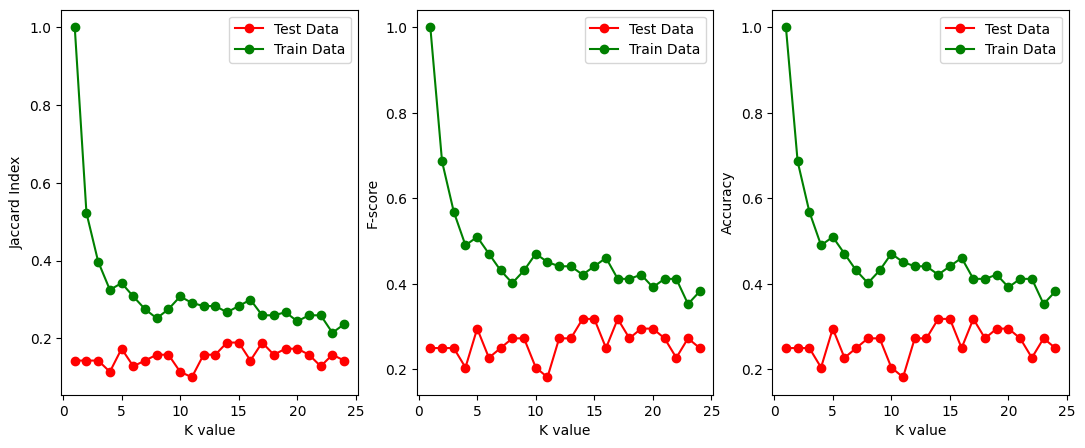

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Finding ideal K-value
Ks = 25
acc_looptest = np.zeros((Ks-1))
acc_looptrain = np.zeros((Ks-1))

Jacc_TestM = np.zeros((Ks-1))
Jacc_TrainM= np.zeros((Ks-1))

F_Loop_TestM = np.zeros((Ks-1))
F_Loop_TrainM= np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neighLoopM = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhatTestLoopM  = neighLoopM.predict(x_test)
    yhatTrainLoopM = neighLoopM.predict(x_train)

    Jacc_TestM[n-1] = jaccard_score(y_test, yhatTestLoopM, average='micro')
    Jacc_TrainM[n-1] = jaccard_score(y_train, yhatTrainLoopM, average='micro')

    F_Loop_TestM[n-1] = f1_score(y_test, yhatTestLoopM, average='micro')
    F_Loop_TrainM[n-1] = f1_score(y_train, yhatTrainLoopM, average='micro')

    acc_looptest[n-1] = accuracy_score(y_test, yhatTestLoopM)
    acc_looptrain[n-1] = accuracy_score(y_train, yhatTrainLoopM)

import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
plt.plot(range(1,Ks),Jacc_TestM,'r-o',range(1,Ks),Jacc_TrainM,'g-o')
plt.legend(['Test Data', 'Train Data'])
plt.xlabel('K value')
plt.ylabel('Jaccard Index')

plt.subplot(1,3,2)
plt.plot(range(1,Ks),F_Loop_TestM,'r-o',range(1,Ks),F_Loop_TrainM,'g-o')
plt.legend(['Test Data', 'Train Data'])
plt.xlabel('K value')
plt.ylabel('F-score')

plt.subplot(1,3,3)
plt.plot(range(1,Ks),acc_looptest,'r-o',range(1,Ks),acc_looptrain,'g-o')
plt.legend(['Test Data', 'Train Data'])
plt.xlabel('K value')
plt.ylabel('Accuracy')

Accuracy score for training:  0.5098039215686274
Accuracy score for test:  0.29545454545454547
Jaccard score for training:  0.34210526315789475
Jaccard score for test:  0.17333333333333334
F Score:  0.5098039215686274 0.29545454545454547


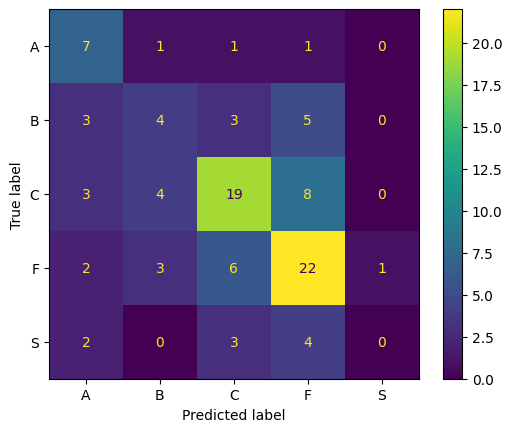

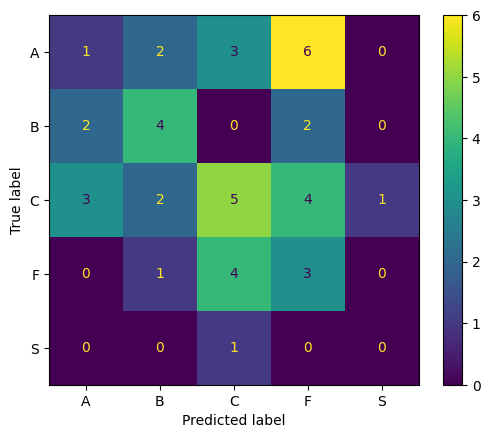

In [42]:
acc_scoreTrain = accuracy_score(y_train,y_pred_train)
acc_scoreTest = accuracy_score(y_test,y_pred_test)
print("Accuracy score for training: ", acc_scoreTrain,)
print("Accuracy score for test: ", acc_scoreTest)

J_scoreTrainM = jaccard_score(y_train,y_pred_train, average='micro')
J_scoreTestM = jaccard_score(y_test,y_pred_test, average='micro')
print("Jaccard score for training: ", J_scoreTrainM,)
print("Jaccard score for test: ", J_scoreTestM)

F_scoreTrainM = f1_score(y_train,y_pred_train, average='micro')
F_scoreTestM = f1_score(y_test,y_pred_test, average='micro')
print("F Score: ", F_scoreTrainM,F_scoreTestM)

CM_scoreTrainM = confusion_matrix(y_train,y_pred_train)   # possible option normalize='true'
CM_scoreTestM = confusion_matrix(y_test,y_pred_test)   # possible option normalize='true'

dispTrM=ConfusionMatrixDisplay(CM_scoreTrainM, display_labels=neigh.classes_)
dispTrM.plot()
dispTsM=ConfusionMatrixDisplay(CM_scoreTestM, display_labels=neigh.classes_)
dispTsM.plot()

<h1> Conclusion </h1>

<h3> Regression Models </h3>
  The first model we attempted was a multiple linear regression model to predict the box office revenue from the IMDB score and budget. The model gave an RSE of around 0.36, a somewhat mediocre error score. To improve the error, we tried ridge and lasso regressions, but since we only had two factors, the addition of weight to a factor was unlikely to be helpful. As we guessed, the ridge and lasso regressions did not impact the RSE. Finally, we tried a 3rd degree polynomial regression model. This gave us the best approximation, with an error of around 0.16.



<h3> Classification </h3>
  For the classification model, we chose KNN because "flop or banger" was a multi-class situation. When developing the model, we found there to be a lot of variability within the data. Everytime we ran the code that split the data into train and test, the graph that plotted the accuracy against the iterated K value showed a surprising amount of variation. We believe the changing numbers is due to the unpredictability of box office revenue, and outlier data points that either did really well or surprisingly bad in theaters.